In [1]:
import os
# List the desired working directory
working_directory = 'C:/Users/Clement Tan/03 codes pack/Practice Assignment 03'

In [2]:
# Import pandas as pd and read the CSV files
import pandas as pd
pd.set_option('display.max_columns',None)
files_to_read = ['1997.csv','1998.csv']


# Read both CSV files into the same DataFrame 1 to 5 (dataframe)
dataframe = pd.concat([
    pd.read_csv(os.path.join(working_directory, '1997.csv')),
    pd.read_csv(os.path.join(working_directory, '1998.csv'))
], ignore_index=True)


In [3]:
# Declare dataframe for CRSArrTime and CRSDepTime
dataframe['CRSArrTime'] = dataframe.CRSArrTime.apply(lambda t: 0 if t / 100 > 23.99 else t)
dataframe['CRSDepTime'] = dataframe.CRSDepTime.apply(lambda t: 0 if t / 100 > 23.99 else t)

# Declare dataframe for CRSArr_Hour and CRSDep_Hour 
dataframe['CRSArr_Hour'] = dataframe.CRSArrTime.apply(lambda t: int(int(t)/100) % 24)
dataframe['CRSDep_Hour'] = dataframe.CRSDepTime.apply(lambda t: int(int(t)/100) % 24)

In [5]:
# Obtain Flight Time in Minutes 
import datetime
dataframe['Flight_Time_Mins'] = dataframe.apply(
    lambda row: (datetime.datetime.strptime(str(row['CRSArrTime']).zfill(4), '%H%M') -
                datetime.datetime.strptime(str(row['CRSDepTime']).zfill(4), '%H%M')).seconds / 60 ,axis=1)

In [6]:
# Drop and cancel rows where the conversion failed (NaT values)
dataframe_filtered = dataframe[(dataframe['Diverted'] != 1) & (dataframe['Cancelled'] != 1)]

In [7]:
# Declare conversion from data values in dataframe to the datetime format
import datetime
datetime.datetime.strptime('0000', '%H%M') # -datetime.datetime.strptime('1310', '%H%M')).seconds / 60


datetime.datetime(1900, 1, 1, 0, 0)

In [8]:
dataframe_filtered.shape

(10529050, 32)

In [9]:
dataframe['CRSDepTime'].max()

2359

In [10]:
for x, y in zip(dataframe['CRSDepTime'].sample(n=1000), dataframe['CRSArrTime'].sample(n=1000)) :
    try:
        datetime.datetime.strptime(str(x).zfill(4), '%H%M')
        (datetime.datetime.strptime(str(x).zfill(4), '%H%M') -
                 datetime.datetime.strptime(str(y).zfill(4), '%H%M')).seconds
  
    except Exception as e:
        print(e) 
        print(x)
        print(str(x).zfill(4))
        print(y)
        print(str(y).zfill(4))


## Introduction

In [11]:
dataframe[['CRSDepTime', 'CRSDep_Hour']][dataframe.CRSDep_Hour ==24] #filtering 

,CRSDepTime,CRSDep_Hour


In [12]:
# Declare minimum delay count variables
min_delay=dataframe[dataframe.DepDelay<=15].shape[0] #filtering 
print(min_delay)

8936976


In [13]:
# Declare big delay count variables
big_delay=dataframe[dataframe.DepDelay>=180].shape[0]
print(big_delay)

40751


In [14]:
# Declare normal delay count variables 
normal_delay=dataframe[(dataframe['DepDelay'] < 180) & (dataframe['DepDelay'] > 15)].shape[0]
print(normal_delay)

1576565


In [15]:
# Declare total Departure delay count 
total_delay=min_delay+big_delay+normal_delay
print(total_delay)

10554292


In [16]:
# Declare proportion for the different Departure Delays delays 
prop_min_delay=min_delay/total_delay
print(prop_min_delay)
prop_big_delay=big_delay/total_delay
print(prop_big_delay)
prop_normal_delay=normal_delay/total_delay
print(prop_normal_delay)

0.8467622461080289
0.0038610832446174504
0.14937667064735372


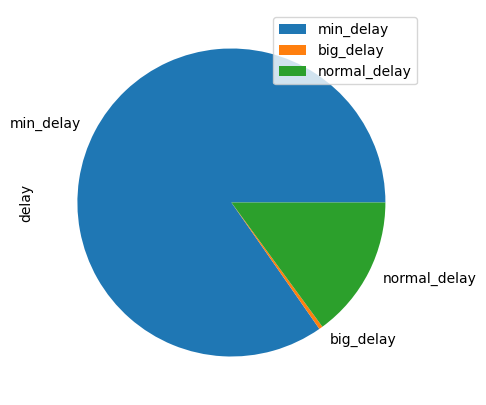

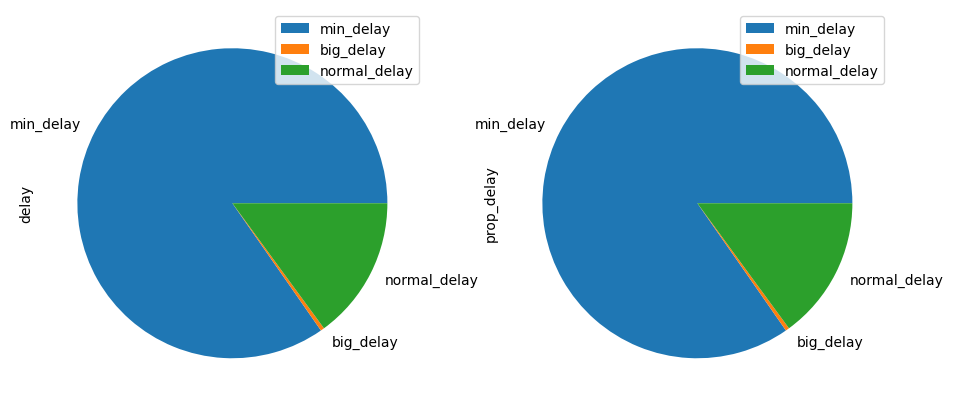

In [17]:
# Draw pie chart for the different delays 
df = pd.DataFrame({'delay': [8936976, 40751, 1576565],
                   'prop_delay': [0.8467622461080289, 0.0038610832446174504, 0.14937667064735372]},
                  index=['min_delay', 'big_delay', 'normal_delay'])
plot = df.plot.pie(y='delay', figsize=(5, 5))
plot = df.plot.pie(subplots=True, figsize=(11, 6))

In [19]:
# Function to calculate 'big_delay'
def calculate_big_delay(row):
    if row['DepDelay'] >= 180:
        return 1  # or any value you want to assign for big_delay
    else:
        return 0  # or any value you want to assign for cases where ArrDelay < 180

# Function to calculate 'min_delay'
def calculate_min_delay(row):
    if row['DepDelay'] <= 15:
        return 1  # or any value you want to assign for min_delay
    else:
        return 0  # or any value you want to assign for cases where ArrDelay > 15

# Function to calculate 'normal_delay'
def calculate_normal_delay(row):
    if 15 < row['DepDelay'] < 180:
        return 1  # or any value you want to assign for normal_delay
    else:
        return 0  # or any value you want to assign for cases outside the condition

# Applying the functions to create the new columns
dataframe['big_delay'] = dataframe.apply(calculate_big_delay, axis=1)
dataframe['min_delay'] = dataframe.apply(calculate_min_delay, axis=1)
dataframe['normal_delay'] = dataframe.apply(calculate_normal_delay, axis=1)

# Display the updated DataFrame
print(big_delay)

40751


In [20]:
dataframe.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,CRSArr_Hour,CRSDep_Hour,Flight_Time_Mins,big_delay,min_delay,normal_delay
0,1997,1,28,2,1615.0,1615,1728.0,1725,WN,1159,N683,73.0,70.0,60.0,3.0,0.0,ABQ,PHX,328,4,9,0,NaN,0,NaN,NaN,NaN,NaN,NaN,17,16,70.0,0,1,0
1,1997,1,29,3,1624.0,1615,1735.0,1725,WN,1159,N626,71.0,70.0,56.0,10.0,9.0,ABQ,PHX,328,4,11,0,NaN,0,NaN,NaN,NaN,NaN,NaN,17,16,70.0,0,1,0
2,1997,1,30,4,1626.0,1615,1730.0,1725,WN,1159,N321,64.0,70.0,52.0,5.0,11.0,ABQ,PHX,328,2,10,0,NaN,0,NaN,NaN,NaN,NaN,NaN,17,16,70.0,0,1,0
3,1997,1,31,5,1628.0,1615,1729.0,1725,WN,1159,N383,61.0,70.0,50.0,4.0,13.0,ABQ,PHX,328,4,7,0,NaN,0,NaN,NaN,NaN,NaN,NaN,17,16,70.0,0,1,0
4,1997,1,14,2,1503.0,1425,1619.0,1535,WN,1221,N513,76.0,70.0,64.0,44.0,38.0,ABQ,PHX,328,4,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN,15,14,70.0,0,0,1


## Part A best time of day to fly.

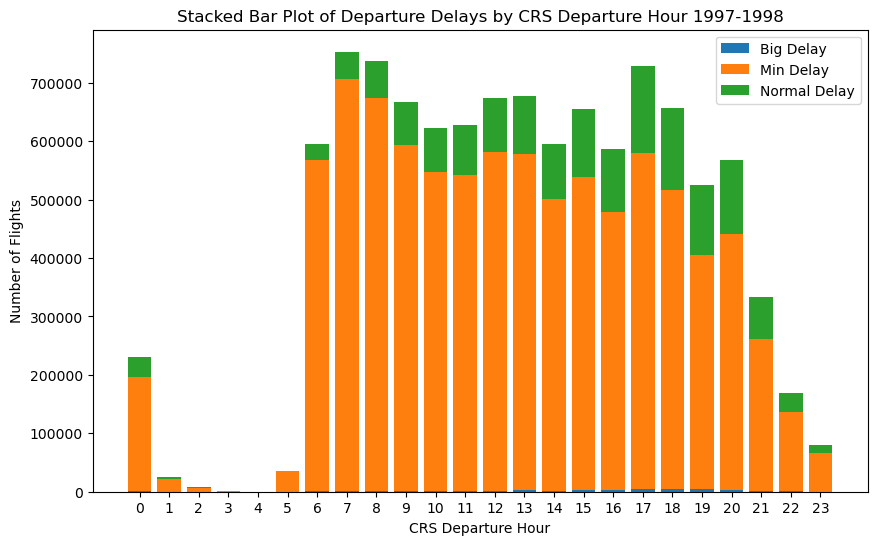

In [21]:
# Let dataframe be your DataFrame
import matplotlib.pyplot as plt

# Grouping by CRS Departure Hour and summing the delay types
grouped_data_departure = dataframe.groupby('CRSDep_Hour')[['big_delay', 'min_delay', 'normal_delay']].sum()

# Using matplotlib to create the stacked bar plot
plt.figure(figsize=(10, 6))

# Stacked bar plot for each delay type
plt.bar(grouped_data_departure.index, grouped_data_departure['big_delay'], label='Big Delay')
plt.bar(grouped_data_departure.index, grouped_data_departure['min_delay'],
        bottom=grouped_data_departure['big_delay'], label='Min Delay')
plt.bar(grouped_data_departure.index, grouped_data_departure['normal_delay'],
        bottom=grouped_data_departure['big_delay'] + grouped_data_departure['min_delay'], label='Normal Delay')

# Adding labels and title
plt.xlabel('CRS Departure Hour')
plt.ylabel('Number of Flights')
plt.title('Stacked Bar Plot of Departure Delays by CRS Departure Hour 1997-1998')

# Set x-ticks to include all hours from 0 to 23
plt.xticks(range(24), ['{}'.format(hour) for hour in range(24)])

# Display the legend
plt.legend()

# Display the plot
plt.show()

## Part A Best day of week to fly

TypeError: missing a required argument: 'height'

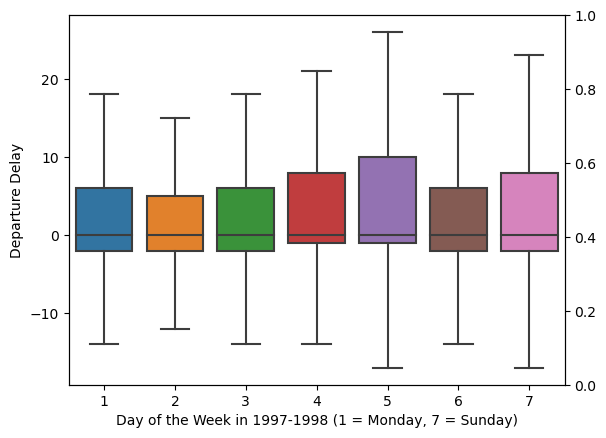

In [22]:
import seaborn as sns

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Boxplot for Arrival Delay by Day of the Week
sns.boxplot(data=dataframe, x='DayOfWeek', y='DepDelay', showfliers=False, ax=ax1)
ax1.set_xlabel('Day of the Week in 1997-1998 (1 = Monday, 7 = Sunday)')
ax1.set_ylabel('Departure Delay')

# Histogram for Day of the Week with thinner lines and transparency
ax2.bar(data=dataframe, x='DayOfWeek', color="b", linewidth=0.4, alpha=0.4)
ax2.set_ylabel('Count')

plt.show()

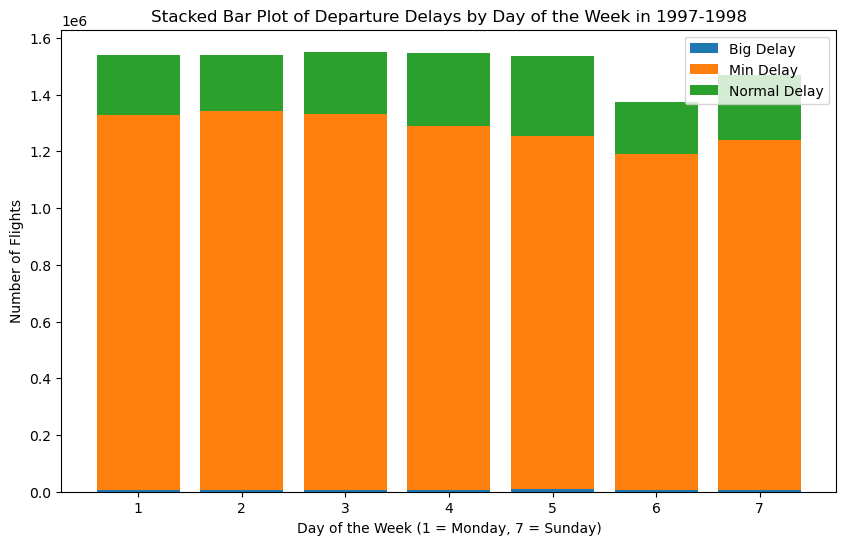

In [23]:
# Assuming dataframe is your DataFrame

# Grouping by Day of the Week and summing the delay types
grouped_data_weekday = dataframe.groupby('DayOfWeek')[['big_delay', 'min_delay', 'normal_delay']].sum()

# Using matplotlib to create the stacked bar plot
plt.figure(figsize=(10, 6))

# Stacked bar plot for each delay type
plt.bar(grouped_data_weekday.index, grouped_data_weekday['big_delay'], label='Big Delay')
plt.bar(grouped_data_weekday.index, grouped_data_weekday['min_delay'],
        bottom=grouped_data_weekday['big_delay'], label='Min Delay')
plt.bar(grouped_data_weekday.index, grouped_data_weekday['normal_delay'],
        bottom=grouped_data_weekday['big_delay'] + grouped_data_weekday['min_delay'], label='Normal Delay')

# Adding labels and title
plt.xlabel('Day of the Week (1 = Monday, 7 = Sunday)')
plt.ylabel('Number of Flights')
plt.title('Stacked Bar Plot of Departure Delays by Day of the Week in 1997-1998')

# Set x-ticks to include all days from 1 to 7
plt.xticks(range(1, 8))

# Display the legend
plt.legend()

# Display the plot
plt.show()

## Part B Do older planes suffer on a year to year basis?

In [24]:
# Create plane info data using the year csv files 
import pandas as pd
dataframe = pd.read_csv(os.path.join(working_directory, '1997.csv'))
plane_data =  pd.read_csv(os.path.join(working_directory, 'plane-data.csv'))
plane_data = plane_data.rename({"tailnum":"TailNum"}, axis='columns')
plane_data.head()

,TailNum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Merge data sets 
flight_data = pd.merge(dataframe, plane_data, on='TailNum')
flight_data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,1997,1,1,3,2212.0,1930,2334.0,2136,DL,345,N128DL,202.0,246.0,190.0,118.0,162.0,ATL,PHX,1587,4,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Corporation,BOEING,07/13/1988,767-332,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1988
1,1997,1,23,4,1738.0,1735,1944.0,1945,DL,689,N128DL,246.0,250.0,224.0,-1.0,3.0,ATL,PHX,1587,4,18,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Corporation,BOEING,07/13/1988,767-332,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1988
2,1997,1,13,1,1156.0,1155,1330.0,1325,DL,999,N128DL,94.0,90.0,75.0,5.0,1.0,ATL,RSW,515,4,15,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Corporation,BOEING,07/13/1988,767-332,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1988
3,1997,1,26,7,2151.0,2140,2300.0,2228,DL,437,N128DL,129.0,108.0,94.0,32.0,11.0,SLC,SAN,626,12,23,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Corporation,BOEING,07/13/1988,767-332,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1988
4,1997,1,14,2,1933.0,1900,2132.0,2122,DL,197,N128DL,299.0,322.0,275.0,10.0,33.0,ATL,SEA,2182,4,20,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Corporation,BOEING,07/13/1988,767-332,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1988


In [26]:
# Assuming you have combined the 'Year' and 'year' columns into flight_data
# flight_data = pd.concat([airbnb_data['Year'], plane_data['year']], axis=1)

# Convert the 'year' column to numeric
flight_data['year'] = pd.to_numeric(flight_data['year'], errors='coerce')

# Drop rows where 'year' is NaN
flight_data.dropna(subset=['year'], inplace=True)

# Convert 'year' column to integer using apply and int constructor
flight_data['year'] = flight_data['year'].apply(lambda x: int(x) if not pd.isna(x) else x)

# Check if the columns are combined correctly
print(flight_data.head())

# Perform the subtraction
flight_data['Age_Flight'] = flight_data['Year'] - flight_data['year']

# Check the result
print(flight_data[['Year', 'year', 'Age_Flight']])

   Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  1997      1           1          3   2212.0        1930   2334.0   
1  1997      1          23          4   1738.0        1735   1944.0   
2  1997      1          13          1   1156.0        1155   1330.0   
3  1997      1          26          7   2151.0        2140   2300.0   
4  1997      1          14          2   1933.0        1900   2132.0   

   CRSArrTime UniqueCarrier  FlightNum TailNum  ActualElapsedTime  \
0        2136            DL        345  N128DL              202.0   
1        1945            DL        689  N128DL              246.0   
2        1325            DL        999  N128DL               94.0   
3        2228            DL        437  N128DL              129.0   
4        2122            DL        197  N128DL              299.0   

   CRSElapsedTime  AirTime  ArrDelay  DepDelay Origin Dest  Distance  TaxiIn  \
0           246.0    190.0     118.0     162.0    ATL  PHX      1587       4  

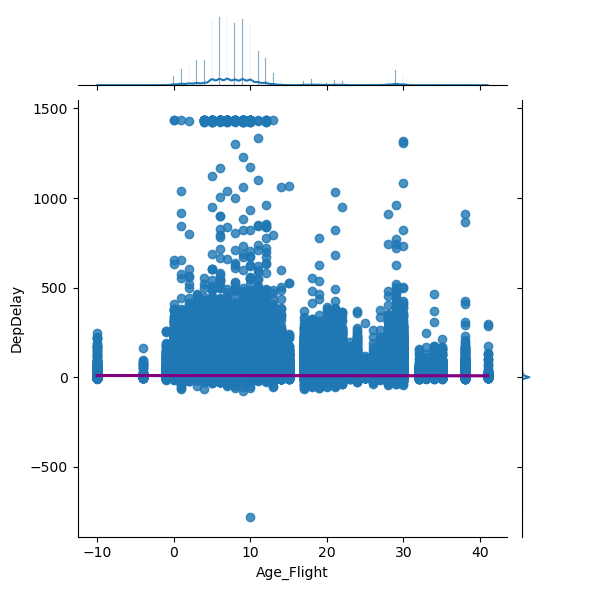

In [27]:
# Create Histogram for the age of planes range and the departure delays range 
import numpy as np, pandas as pd; np.random.seed(0)
import seaborn as sns
g = sns.jointplot(x="Age_Flight", y="DepDelay", data=flight_data, kind='reg')


# Create Regional line at 0 
regline = g.ax_joint.get_lines()[0]
regline.set_color('purple')
regline.set_zorder(5)

In [28]:
# Function to calculate 'big_delay' for Departure
def calculate_big_delay(row):
    if row['DepDelay'] >= 180:
        return 1  # or any value you want to assign for big_delay
    else:
        return 0  # or any value you want to assign for cases where ArrDelay < 180

# Function to calculate 'min_delay' for Departure
def calculate_min_delay(row):
    if row['DepDelay'] <= 15:
        return 1  # or any value you want to assign for min_delay
    else:
        return 0  # or any value you want to assign for cases where ArrDelay > 15

# Function to calculate 'normal_delay' for Departure
def calculate_normal_delay(row):
    if 15 < row['DepDelay'] < 180:
        return 1  # or any value you want to assign for normal_delay
    else:
        return 0  # or any value you want to assign for cases outside the condition

# Applying the functions to create the new columns
flight_data['big_delay'] = flight_data.apply(calculate_big_delay, axis=1)
flight_data['min_delay'] = flight_data.apply(calculate_min_delay, axis=1)
flight_data['normal_delay'] = flight_data.apply(calculate_normal_delay, axis=1)

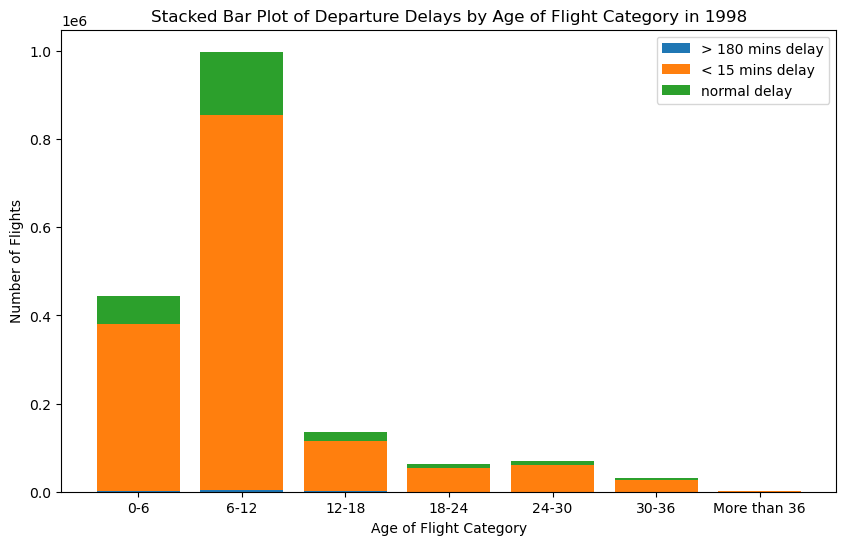

In [29]:
# Create stack bar plots for the flight age categories and respective delays

# Define bins for different ranges of flight times (adjust as needed)
bins = [0, 6, 12, 18, 24, 30, 36, float('inf')]

# Create a new column 'Flight_Time_Category' based on the bins
flight_data['Age_Flight_Category'] = pd.cut(flight_data['Age_Flight'], bins=bins, labels=False, right=False)

# Grouping by Flight Time Category and summing the delay types
grouped_data_age_flight = flight_data.groupby('Age_Flight_Category')[['big_delay', 'min_delay', 'normal_delay']].sum()

# Using matplotlib to create the stacked bar plot
plt.figure(figsize=(10, 6))

# Stacked bar plot for each delay type
plt.bar(grouped_data_age_flight.index, grouped_data_age_flight['big_delay'], label='> 180 mins delay')
plt.bar(grouped_data_age_flight.index, grouped_data_age_flight['min_delay'],
        bottom=grouped_data_age_flight['big_delay'], label='< 15 mins delay')
plt.bar(grouped_data_age_flight.index, grouped_data_age_flight['normal_delay'],
        bottom=grouped_data_age_flight['big_delay'] + grouped_data_age_flight['min_delay'], label='normal delay')

# Adding labels and title
plt.xlabel('Age of Flight Category')
plt.ylabel('Number of Flights')
plt.title('Stacked Bar Plot of Departure Delays by Age of Flight Category in 1998')

# Set x-ticks to include all flight time categories
bin_labels = [f"{bins[i]}-{bins[i+1]}" if i < len(bins)-2 else f"More than {bins[i]}" for i in range(len(bins)-1)]
plt.xticks(range(len(grouped_data_age_flight.index)), bin_labels)

# Display the legend
plt.legend()

# Display the plot
plt.show()

## Part C For each year, create a logistic regression model for the probability of diverted US flights

In [30]:
# Delcare libaries for logistic regression machine learning 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
#from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import RocCurveDisplay


#svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
#rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=svc_disp.ax_)
from sklearn.model_selection import train_test_split, GridSearchCV     

In [31]:
# Declare variables for the logistic regression

numerical_values = ['CRSDepTime','CRSArrTime','CRSElapsedTime','Distance']
categorical_info =['DayOfWeek','UniqueCarrier',"FlightNum",'TailNum',
            'Origin','Dest']
numerical_transformer= Pipeline(steps=[
    ('imputer',SimpleImputer()),
    ('scaler',StandardScaler())])
categorical_transformer= Pipeline(steps=[
    ('imputer',SimpleImputer()),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))])
data_transformer= ColumnTransformer(
    transformers=[
        ('numerical',numerical_transformer,numerical_values),
        ('categorical',categorical_transformer,categorical_info)])

In [32]:
# Declare parameters to input for x axis 
parameters = ['DayOfWeek','CRSDepTime','CRSArrTime','UniqueCarrier',"FlightNum",'TailNum','CRSElapsedTime',
            'Origin','Dest','Distance']

flight_data[categorical_info].dtypes
# Convert 'Day of week' to string
flight_data['DayOfWeek'] = flight_data['DayOfWeek'].astype(str)

# Convert 'flight num' to string
flight_data['FlightNum'] = flight_data['FlightNum'].astype(str)

In [34]:
from sklearn.utils import column_or_1d
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Assuming you have defined data_transformer, X, and y earlier
x = flight_data[parameters].copy()
x.head()
y = flight_data[['Diverted']].values


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Assuming y_train is your target variable
y_train_reshaped = column_or_1d(y_train.ravel(), warn=False)

# Create a pipeline with logistic regression and data transformer
pipe_lr = Pipeline(steps=[
    ('data_transformer', data_transformer),
    ('pipe_lr', LogisticRegression(max_iter=10000, solver='lbfgs', penalty='l2'))
])

# Define the parameter grid
param_grid = {
    'data_transformer__numerical__imputer__strategy': ['mean', 'median'],
    'data_transformer__categorical__imputer__strategy': ['constant', 'most_frequent'],
    'pipe_lr__penalty': ['l2']  # Only 'l2' penalty is supported for lbfgs solver
}

# Create the grid search
grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid, error_score='raise')
grid_lr.fit(x_train, y_train_reshaped)

GridSearchCV(error_score='raise',
             estimator=Pipeline(steps=[('data_transformer',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['CRSDepTime',
                                                                          'CRSArrTime',
                                                                          'CRSElapsedTime',
                                                                          'Distance']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['DayOfWeek',
                                                                          'UniqueCarrier',
                                                                          'FlightNum',
                                                                          'TailNum',
                                                                          'Origin',
                                                                          'Dest'])])),
                                       ('pipe_lr',
                                        LogisticRegression(max_iter=10000))]),
             param_grid={'data_transformer__categorical__imputer__strategy': ['constant',
                                                                              'most_frequent'],
                         'data_transformer__numerical__imputer__strategy': ['mean',
                                                                            'median'],
                         'pipe_lr__penalty': ['l2']})

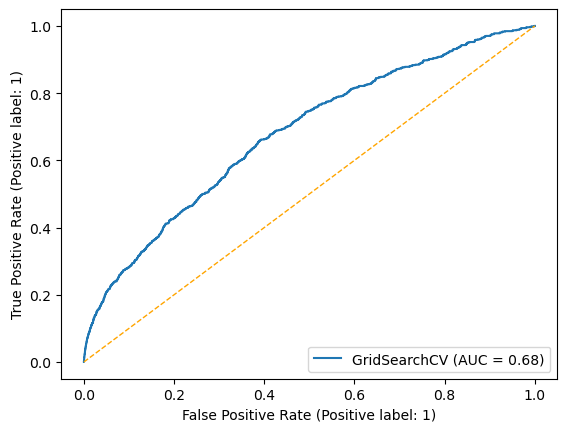

In [35]:
from sklearn.metrics import RocCurveDisplay

# Assuming grid_lr is your trained logistic regression model
grid_lr_disp = RocCurveDisplay.from_estimator(grid_lr, x_test, y_test)
ax = grid_lr_disp.ax_
ax.plot([0, 1], [0, 1], color='orange', lw=1, linestyle='--')
plt.show()